# practice of pyplot

pyplot is a set of commands to use features from matplotlib.

To install
```
sudo apt-get install python3-matplotlib
```

Tutorial
https://matplotlib.org/tutorials/introductory/pyplot.html#intro-to-pyplot


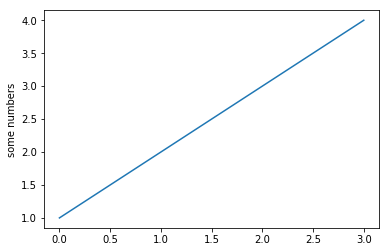

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

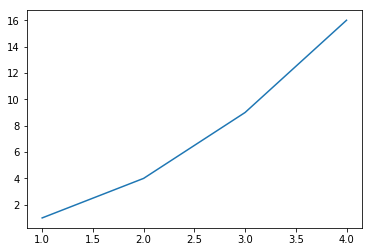

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

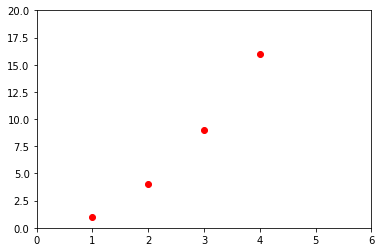

In [4]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20])
plt.show()

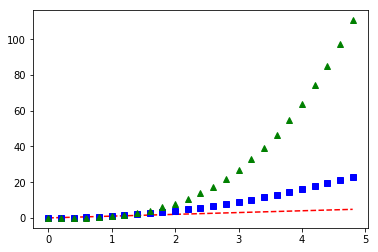

In [5]:
import numpy as np
t = np.arange(0.,5.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.show()

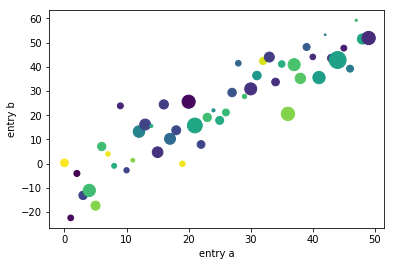

In [6]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

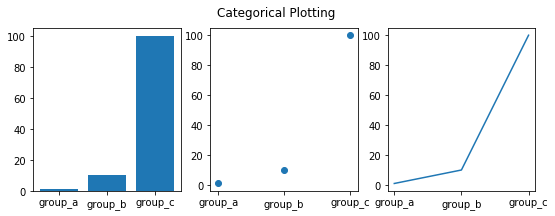

In [9]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

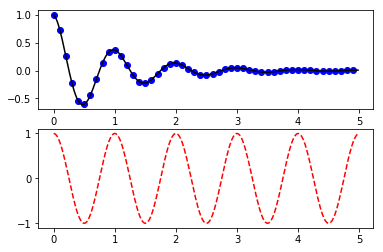

In [10]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

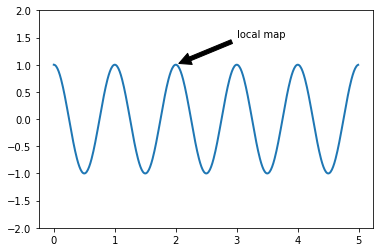

In [16]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
plt.plot(t, s, lw=2)
plt.annotate('local map', xy=(2,1), xytext=(3,1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.ylim(-2,2)
plt.show()

Add legends to LineCollection plot

https://stackoverflow.com/questions/19877666/add-legends-to-linecollection-plot

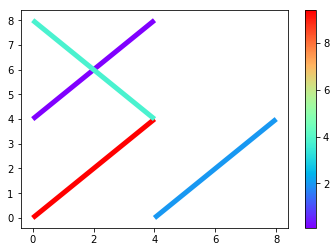

In [27]:
# def f(t):
#     return np.exp(-t) * np.cos(2*np.pi*t)
# t1 = np.arange(0.0, 5.0, 0.1)
# t2 = np.arange(0.0, 5.0, 0.02)
# line1, line2 = plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

import numpy
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# The line format you curently have:
lines = [[(0, 1, 2, 3, 4), (4, 5, 6, 7, 8)],
         [(0, 1, 2, 3, 4), (0, 1, 2, 3, 4)],
         [(0, 1, 2, 3, 4), (8, 7, 6, 5, 4)],
         [(4, 5, 6, 7, 8), (0, 1, 2, 3, 4)]]

# Reformat it to what `LineCollection` expects:
lines = [list(zip(x, y)) for x, y in lines]

z = np.array([0.1, 9.4, 3.8, 2.0])

fig, ax = plt.subplots()
lines = LineCollection(lines, array=z, cmap=plt.cm.rainbow, linewidths=5)
ax.add_collection(lines)
fig.colorbar(lines)

# Manually adding artists doesn't rescale the plot, so we need to autoscale
ax.autoscale()

plt.show()

# marker types

https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

# color maps

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


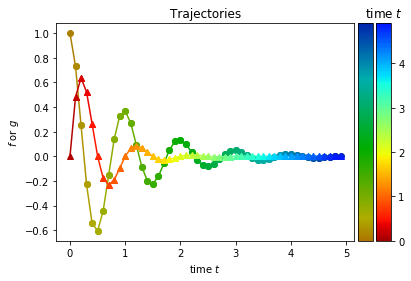

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import copy

t = np.arange(0.0, 5.0, 0.1)
maxt = max(t)

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
def g(t):
    return np.exp(-2*t) * np.sin(2*np.pi*t)

def cm1f(val): # original
    val /= maxt
    h1 = 227/360
    h2 = 40/360
    h = (1-val)*(h2-h1)+h1
    return np.array(list(colorsys.hsv_to_rgb(h,1,0.68)) + [1])

def cm2f(val): # kind of new
    val /= maxt
    return plt.cm.jet(0.97-val*0.82)

def plotPath(points, style, cm):
    for i in range(1,len(points)):
        p_prev = points[i-1]
        p = points[i]
        plt.plot([p_prev[0], p[0]], [p_prev[1], p[1]], style, color=cm(p[0]))

fig, ax = plt.subplots()
ax.set_title('Trajectories')

# plot1
cm1 = copy.deepcopy(plt.cm.get_cmap('rainbow'))
cm1._init()
cm1._lut = np.array([cm1f(x) for x in np.linspace(0, maxt, cm1.N)])
mpl.cm.register_cmap(name='cm1', cmap=cm1)
plotPath(list(zip(t, f(t))), '-o', cm1f)

# plot2
cm2 = copy.deepcopy(plt.cm.get_cmap('rainbow'))
cm2._init()
cm2._lut = np.array([cm2f(x) for x in np.linspace(0, maxt, cm2.N)])
mpl.cm.register_cmap(name='cm2', cmap=cm2)
plotPath(list(zip(t, g(t))), '-^', cm2f)

plt.ylabel('$f$ or $g$')
plt.xlabel('time $t$')

# colorbar
divider = make_axes_locatable(plt.gca())
norm = mpl.colors.Normalize(vmin = 0, vmax = maxt)
ax_cb1 = divider.new_horizontal(size="5%", pad=0.05)
ax_cb1.set_axis_off() # hide the axis of the first colorbar
cb1 = mpl.colorbar.ColorbarBase(ax_cb1, cmap='cm1', norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb1)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)
ax_cb2.set_title('time $t$')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap='cm2', norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb2)

plt.show()